💡 Mục đích chính của PCA:
📌	PCA dùng để
🧹	Giảm chiều dữ liệu nhưng vẫn giữ được phần lớn thông tin.
🔍	Tìm ra các "thành phần chính" – chiều không gian mới chứa nhiều phương sai nhất (tức là chứa nhiều thông tin nhất).
📉	Khử nhiễu, tránh overfitting khi có quá nhiều đặc trưng.
🎨	Trực quan hóa dữ liệu đa chiều bằng 2D/3D.

Mean Squared Error: 3.4263398929598856


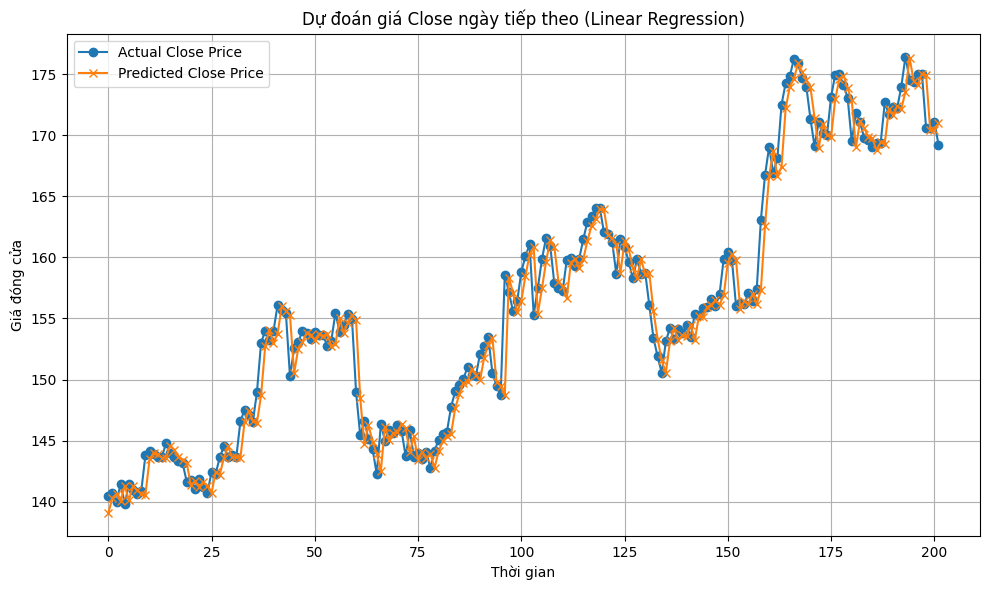

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Đọc file
df = pd.read_csv("stock_prices.csv")

# Lọc 1 cổ phiếu cụ thể, ví dụ: AAPL
df_stock = df[df['symbol'] == 'AAPL'].sort_values(by='date')

# Chọn các cột đặc trưng
features = ['open', 'high', 'low', 'close', 'volume']

# Tạo dữ liệu supervised learning: dùng thông tin ngày T để dự đoán close của ngày T+1
X = df_stock[features].shift(0).iloc[:-1]  # Ngày T
y = df_stock['close'].shift(-1).iloc[:-1]  # Close ngày T+1

# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X_scaled)
# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Vẽ kết quả
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', marker='o')
plt.plot(y_pred, label='Predicted Close Price', marker='x')
plt.title('Dự đoán giá Close ngày tiếp theo (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


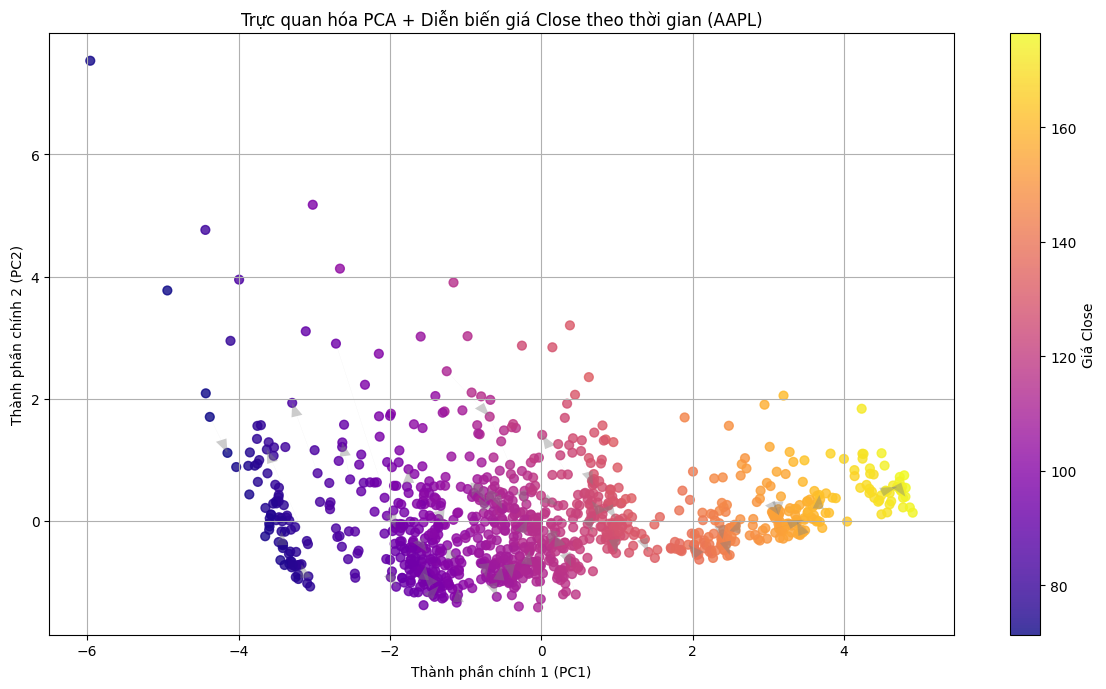

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu
df = pd.read_csv("stock_prices.csv")

# Lọc mã cổ phiếu (ví dụ AAPL)
df_stock = df[df['symbol'] == 'AAPL'].sort_values(by='date')

# Lấy đặc trưng
features = ['open', 'high', 'low', 'close', 'volume']
X = df_stock[features]
close_prices = df_stock['close'].values  # lưu lại để tô màu

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Vẽ scatter với màu theo giá close
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=close_prices,
    cmap='plasma',  # màu gradient theo giá
    s=40,
    alpha=0.8
)
plt.colorbar(scatter, label='Giá Close')

# Vẽ mũi tên chuyển động thời gian (mỗi 20 bước để tránh rối)
for i in range(0, len(X_pca) - 1, 20):
    plt.arrow(X_pca[i, 0], X_pca[i, 1],
              X_pca[i+1, 0] - X_pca[i, 0],
              X_pca[i+1, 1] - X_pca[i, 1],
              shape='full', lw=0, length_includes_head=True,
              head_width=0.15, color='gray', alpha=0.4)

plt.title('Trực quan hóa PCA + Diễn biến giá Close theo thời gian (AAPL)')
plt.xlabel('Thành phần chính 1 (PC1)')
plt.ylabel('Thành phần chính 2 (PC2)')
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Ý nghĩa biểu đồ:
🎯 Trục PC1 và PC2:
Là hai trục thành phần chính do PCA tạo ra từ 5 đặc trưng gốc (open, high, low, close, volume).

PCA chọn hướng có phương sai lớn nhất để chiếu dữ liệu lên → tức là hướng mang nhiều thông tin nhất.

🎨mã màu sắc
Màu tím – xanh dương: tương ứng với giá close thấp

Màu vàng – cam: là giá close cao

=> Dễ thấy: phần bên trái của PC1 (âm) là vùng giá thấp hơn, phía phải (PC1 dương) là vùng giá cao hơn.

🔄 3. Quỹ đạo mũi tên = tiến trình thời gian
Mũi tên mô phỏng dòng thời gian (từ quá khứ → hiện tại)

Chúng ta thấy các mũi tên chủ yếu đi từ trái → phải

Điều này có nghĩa: thị trường đang trong xu hướng tăng giá dần đều

Biểu đồ phản ánh giai đoạn tích lũy → tăng trưởng giá

🔍 4. Các cụm dữ liệu (clusters)
Vùng bên trái (PC1 âm): rất nhiều điểm tập trung → giai đoạn thị trường ổn định ở mức giá thấp

Vùng giữa và phải (PC1 dương): có xu hướng tỏa ra → thị trường trở nên nhiễu loạn hơn, dao động rộng, giá biến động nhiều

Nhận xét
1. Dữ liệu giá cổ phiếu AAPL có xu hướng thời gian rõ rệt
Các điểm dữ liệu dần di chuyển từ trái sang phải theo trục PC1

Nghĩa là: các đặc trưng như open, high, low, volume đang thay đổi theo hướng có liên quan mật thiết đến sự tăng giá

Hay nói cách khác, PCA đã thành công trong việc “gói gọn” yếu tố thời gian trong 2 thành phần chính

💡 2. Có các giai đoạn thị trường rõ rệt
Dựa trên mật độ phân bố và màu sắc:

Vùng PCA (PC1, PC2)	Diễn giải dữ liệu
Phía trái PCA (PC1 < 0)	Giá close thấp (khoảng $70–100), dữ liệu tập trung hơn → thị trường ổn định hoặc tích lũy
Giữa PCA	Giá close tăng dần ($100–130), bắt đầu phân tán hơn → thị trường bắt đầu dịch chuyển mạnh
Phía phải PCA (PC1 > 0)	Giá cao ($130–170+), phân bố loãng hơn, biến động mạnh hơn → giai đoạn tăng trưởng hoặc “bong bóng”
📈 3. Thành phần chính PC1 gần như đại diện cho giá (gián tiếp)
Vì mối tương quan giữa PC1 và giá close thể hiện qua:

Các điểm có PC1 càng cao → màu càng sáng (giá close cao hơn)

Cho thấy: PCA đã phát hiện ra một chiều không gian đại diện cho động lượng giá cổ phiếu

🧠 4. Ứng dụng thực tiễn từ biểu đồ PCA 2D
Giảm chiều dữ liệu: PCA giúp bạn rút gọn từ 5 đặc trưng còn 2 thành phần chính mà vẫn giữ phần lớn thông tin

Tiền xử lý trước phân cụm: Bạn có thể chạy KMeans hoặc DBSCAN trên PCA 2D để phát hiện các trạng thái thị trường tự động

Dùng làm input cho mô hình ML: Dữ liệu sau PCA có thể đưa vào mô hình học máy với ít nhiễu và ổn định hơn

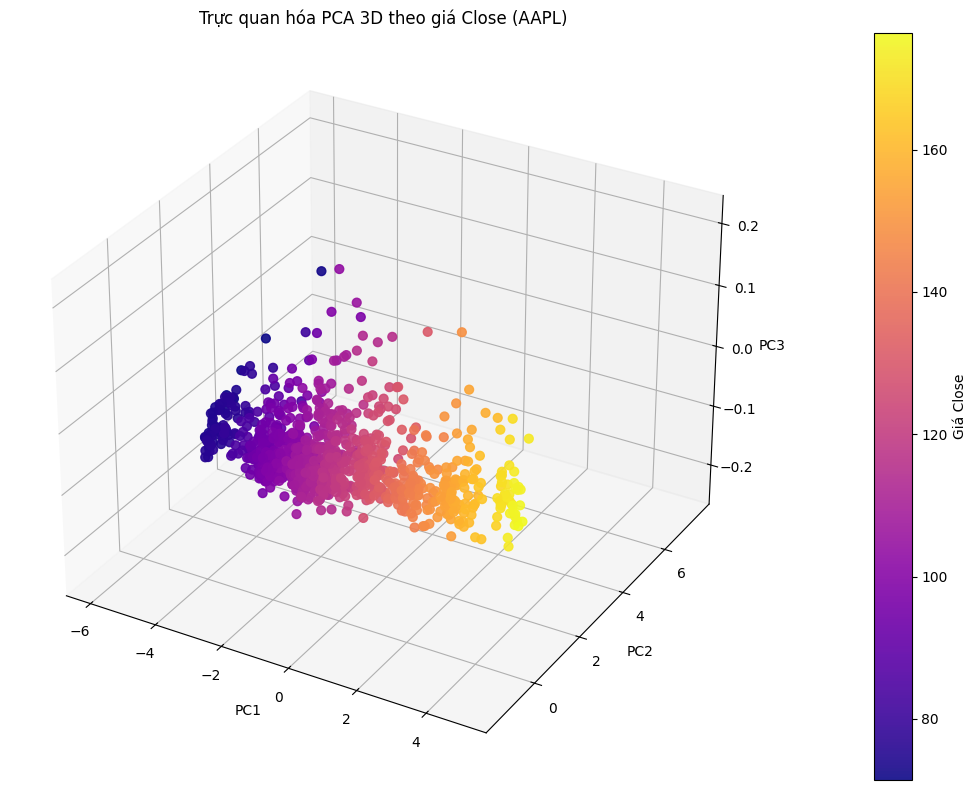

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Đọc dữ liệu
df = pd.read_csv("stock_prices.csv")

# Chọn cổ phiếu cụ thể (ví dụ AAPL)
df_stock = df[df['symbol'] == 'AAPL'].sort_values(by='date')

# Đặc trưng
features = ['open', 'high', 'low', 'close', 'volume']
X = df_stock[features]
close_prices = df_stock['close'].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=close_prices, cmap='plasma', s=40, alpha=0.9
)

ax.set_title('Trực quan hóa PCA 3D theo giá Close (AAPL)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

cb = plt.colorbar(sc, ax=ax, pad=0.1)
cb.set_label('Giá Close')

plt.tight_layout()
plt.show()


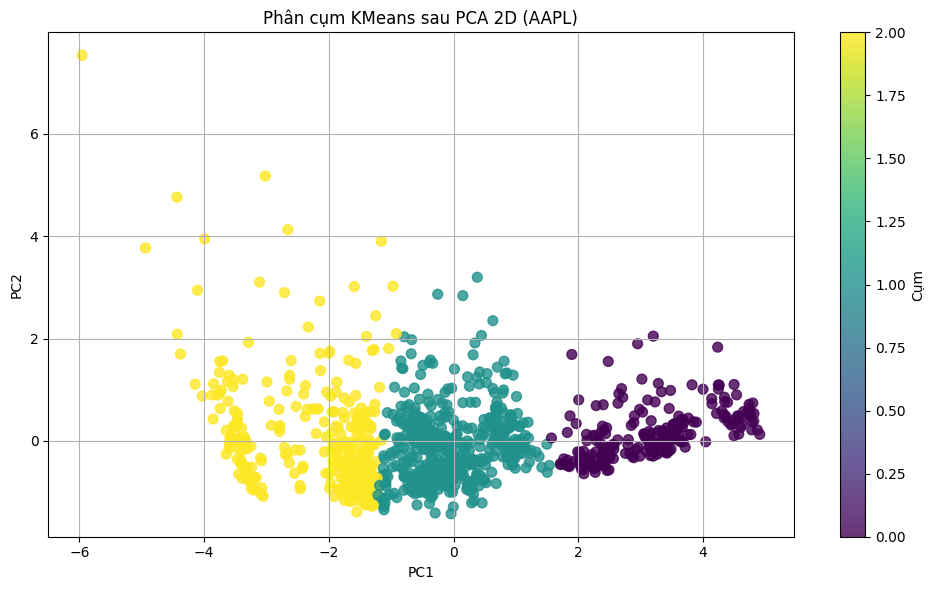

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("stock_prices.csv")
df_stock = df[df['symbol'] == 'AAPL'].sort_values(by='date')

# Các đặc trưng
features = ['open', 'high', 'low', 'close', 'volume']
X = df_stock[features]

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA giảm còn 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Áp dụng KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Thêm cụm vào DataFrame
df_stock['cluster'] = clusters
df_stock['PC1'] = X_pca[:, 0]
df_stock['PC2'] = X_pca[:, 1]

# Trực quan hóa
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_stock['PC1'], df_stock['PC2'],
                      c=df_stock['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title('Phân cụm KMeans sau PCA 2D (AAPL)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.colorbar(scatter, label='Cụm')
plt.tight_layout()
plt.show()


Cụm	Màu	Ý nghĩa
0	🟣 Tím	Giai đoạn thị trường ổn định, giá cao
1	🟢 Xanh	Giai đoạn chuyển tiếp (sideway)
2	🟡 Vàng	Giai đoạn thị trường rủi ro, giá thấp

✅ Cụm 0 (màu tím đậm) — Nằm ở phía phải:
PCA1 cao ⇒ biểu hiện của giai đoạn giá cổ phiếu cao, ổn định.

Rất tập trung và chặt ⇒ dữ liệu ít biến động ⇒ giai đoạn thị trường ổn định và tích cực.

✅ Cụm 1 (màu xanh lam ngọc) — Ở giữa:
Trải dài rộng ⇒ giai đoạn chuyển tiếp, có thể là lúc cổ phiếu đang có sự dao động giữa tăng và giảm.

.

✅ Cụm 2 (màu vàng) — Phía bên trái:
PCA1 âm ⇒ tương ứng với thị trường giá thấp hơn, nhiều phân tán ⇒ giai đoạn bất ổn hoặc điều chỉnh mạnh.

Cụm rải rác hơn ⇒ biểu hiện sự dao động mạnh, biến động giá và khối lượng giao dịch nhiều.